<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_09_Word2vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[워드투벡터(Word2Vec)](https://wikidocs.net/22660)**

In [1]:
from gensim.models import Word2Vec

## **내적과의 연관성**

In [2]:
import numpy as np
# 샘플 문장들 (단어 집합을 단순화한 예제)
sentences = [
    ["cat", "chases", "mouse"],
    ["dog", "barks", "loudly"],
    ["bird", "sings", "beautifully"],
    ["fish", "swims", "quickly"],
    ["love", "deep", "learning"]
]

# Word2Vec 모델 훈련
model = Word2Vec(sentences,
                 vector_size=2,
                 window=2,
                 min_count=1,
                 sg=1)  # sg=1은 skip-gram 방식 사용
model

In [3]:
# 특정 단어들의 임베딩 벡터 가져오기
vector_love = model.wv['love']
vector_love

array([-0.4651475 , -0.35584044], dtype=float32)

In [4]:
vector_deep = model.wv['deep']
vector_deep

array([0.25516748, 0.45046365], dtype=float32)

In [5]:
# 벡터 간의 내적(inner product) 계산
inner_product = np.dot(vector_love, vector_deep)

print(f"'love' 벡터: {vector_love}")
print(f"'deep' 벡터: {vector_deep}")
print(f"'love'와 'deep'의 내적: {inner_product}")

'love' 벡터: [-0.4651475  -0.35584044]
'deep' 벡터: [0.25516748 0.45046365]
'love'와 'deep'의 내적: -0.2789837121963501


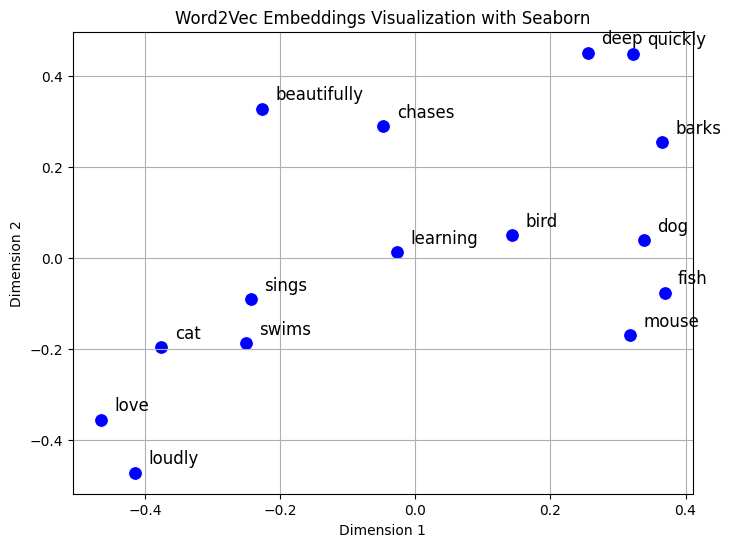

In [6]:
# 모든 단어들의 임베딩 벡터 가져오기
import matplotlib.pyplot as plt
import seaborn as sns

# 단어 벡터 가져오기
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# 벡터 시각화
x_coords = [vec[0] for vec in word_vectors]
y_coords = [vec[1] for vec in word_vectors]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_coords, y=y_coords, s=100, color='blue')

for word, (x, y) in zip(words, zip(x_coords, y_coords)):
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word2Vec Embeddings Visualization with Seaborn')
plt.grid(True)
plt.show()

## Text 예제로 실습

In [7]:
import gensim.downloader as api

# 데이터셋 로드 (간단한 텍스트 코퍼스 예시)
dataset = api.load("text8")
dataset

[==================================================] 100.0% 31.6/31.6MB downloaded


In [8]:
print(list(dataset)[0])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 'so

In [9]:
len(list(dataset))

1701

### Word2Vetor 학습에 시간이 많이 걸려 dataset의 10개만 학습하여 벡터화

In [12]:
# 데이터셋에서 처음 10개만 사용
limited_dataset = list(dataset)[:10]
limited_dataset[:1][0][:10]

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against']

In [13]:

# Word2Vec 모델 생성
model = Word2Vec(
    sentences=limited_dataset,  # 학습에 사용할 문장
    vector_size=10,    # 단어 벡터의 차원 수
    window=2,           # 주변 단어를 고려할 윈도우 사이즈
    min_count=2,        # 최소 출현 빈도 수가 2 이상인 단어만 학습에 사용
    workers=4,          # 워커 스레드 수
    sg=1                # Skip-gram 방식 사용 (0이면 CBOW 방식 사용)
)


In [14]:

# 특정 단어의 벡터 얻기
word_vector = model.wv['king']
print(f"'king' 단어의 벡터: {word_vector[:10]}...")

# 단어 간 유사도 확인
similarity = model.wv.similarity('king', 'queen')
print(f"'king'과 'queen'의 유사도: {similarity}")

# 가장 유사한 단어 찾기
similar_words = model.wv.most_similar('king', topn=5)
print("'king'과 가장 유사한 단어 5개:")
for word, score in similar_words:
    print(f"{word}: {score}")


'king' 단어의 벡터: [ 0.13412601  0.03101421  0.34431708 -0.24297659  0.42645296 -0.06707195
  0.8305269   0.5881061  -0.76674736 -0.02318177]...
'king'과 'queen'의 유사도: 0.9830089807510376
'king'과 가장 유사한 단어 5개:
drive: 0.9970076084136963
vote: 0.9952071309089661
aspects: 0.9948607683181763
back: 0.9947994947433472
sin: 0.9943904876708984


In [15]:
model.wv['king'] + model.wv['queen']

array([ 0.11663049,  0.07865947,  0.60187316, -0.4801905 ,  0.6865426 ,
       -0.07445925,  1.515452  ,  1.0743072 , -1.5329585 ,  0.01654462],
      dtype=float32)

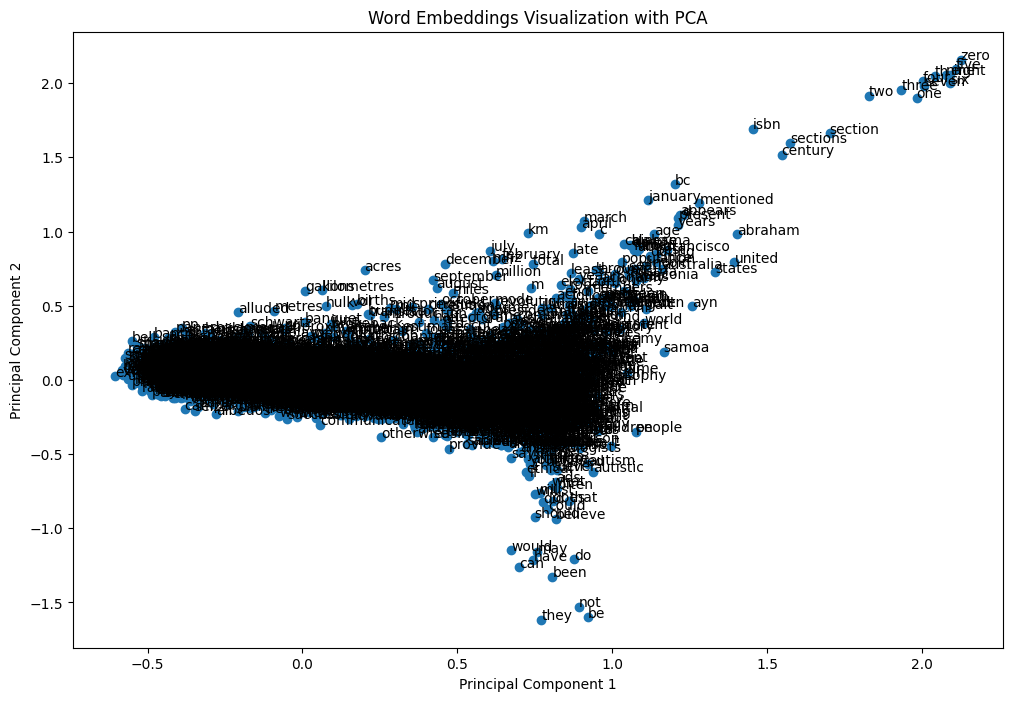

In [16]:
# prompt: 모든 단어의 word2vec을 구하고 PCA로 2차우너에 시각화

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ... (previous code)

# 모든 단어의 벡터를 가져옵니다.
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])


# PCA를 사용하여 2차원으로 축소합니다.
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)


# 시각화합니다.
plt.figure(figsize=(12, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embeddings Visualization with PCA')
plt.show()

### **[워드투벡터(Word2Vec)](http://w.elnn.kr/search/)**

### Deeplearning의 중간 쯤 레이어에서 짜르면 Embedding Word가 된다..

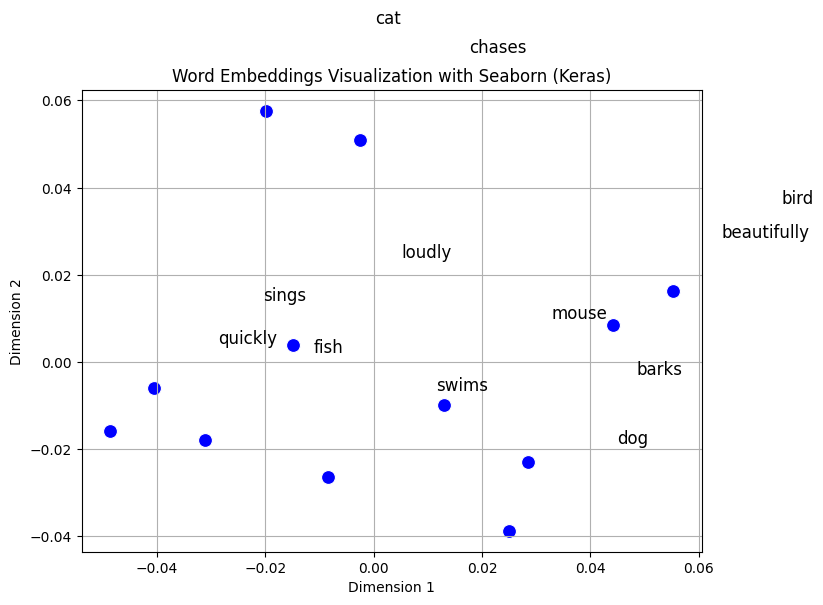

'chases' 벡터: [-0.026192    0.04788763]
'cat' 벡터: [-0.04475484  0.04708038]
'chases'와 'cat'의 내적: 0.003426786744967103


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.decomposition import PCA

# 샘플 문장들 (단어 집합을 단순화한 예제)
sentences = [
    "cat chases mouse",
    "dog barks loudly",
    "bird sings beautifully",
    "fish swims quickly"
]

# 토크나이저로 단어 인덱싱
# 텍스트 데이터를 숫자로 변환하기 위해 토크나이저를 사용합니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)  # 단어 인덱스를 구축합니다.
sequences = tokenizer.texts_to_sequences(sentences)  # 각 문장을 정수 시퀀스로 변환합니다.
word_index = tokenizer.word_index  # 단어와 인덱스 매핑을 가져옵니다.

# 시퀀스 패딩
# 시퀀스의 길이를 맞추기 위해 패딩을 추가합니다.
max_length = max(len(seq) for seq in sequences)  # 가장 긴 시퀀스의 길이를 구합니다.
data = pad_sequences(sequences, maxlen=max_length)  # 모든 시퀀스를 동일한 길이로 패딩합니다.

# 모델 구성
# 단어 임베딩을 위해 딥러닝 모델을 정의합니다.
vocab_size = len(word_index) + 1  # 단어 집합 크기 (인덱스는 1부터 시작하기 때문에 +1 필요)
embedding_dim = 2  # 2차원으로 임베딩

# Sequential 모델 정의
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))  # Embedding 레이어 추가 (input_length는 제거)
model.add(Flatten())  # 2차원 임베딩 벡터를 1차원으로 변환
model.add(Dense(1, activation='sigmoid'))  # 출력 레이어 추가 (이진 분류용)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련 (여기서는 훈련 없이 임베딩만 가져올 것이므로 dummy target 사용)
model.fit(data, np.array([1, 0, 1, 0]), epochs=1, verbose=0)  # 최소한 1 epoch 훈련 (임베딩 벡터 초기화)

# 임베딩 레이어에서 가중치 추출
# Embedding 레이어에서 학습된 가중치를 가져옵니다.
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]  # 각 단어에 대한 임베딩 벡터

# 모든 단어들의 임베딩 벡터 가져오기
words = list(word_index.keys())  # 단어 리스트 가져오기
word_vectors = [embedding_weights[idx] for word, idx in word_index.items()]  # 각 단어의 임베딩 벡터 추출

# PCA를 사용하여 2차원 시각화
# 임베딩 벡터를 PCA로 2차원으로 축소하여 시각화합니다.
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)  # 2차원으로 변환된 벡터

x_coords = reduced_vectors[:, 0]  # 첫 번째 차원 좌표
y_coords = reduced_vectors[:, 1]  # 두 번째 차원 좌표

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_coords, y=y_coords, s=100, color='blue')  # 단어 임베딩의 좌표를 산점도로 표시

# 각 단어에 라벨 추가
for word, (x, y) in zip(words, zip(x_coords, y_coords)):
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)  # 각 좌표에 단어 표시

# 그래프 설정
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Visualization with Seaborn (Keras)')
plt.grid(True)
plt.show()

# 특정 단어들의 임베딩 벡터 가져오기
# 'chases'와 'cat'의 임베딩 벡터를 추출합니다.
vector_chases = embedding_weights[word_index['chases']]
vector_cat = embedding_weights[word_index['cat']]

# 벡터 간의 내적(inner product) 계산
# 두 벡터 간의 내적을 통해 유사도를 측정합니다.
inner_product = np.dot(vector_chases, vector_cat)

# 결과 출력
print(f"'chases' 벡터: {vector_chases}")
print(f"'cat' 벡터: {vector_cat}")
print(f"'chases'와 'cat'의 내적: {inner_product}")

In [18]:
data

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 3, 2)                │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (408.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68 (276.00 B)

### 입력 문장은 최대 길이가 3인 시퀀스로 패딩되었고, 각 단어는 2차원 임베딩 벡터로 표현(3,2)

In [20]:
# prompt: iris 데이터를 keras

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Prepare the data
X = iris.drop('species', axis=1)
y = iris['species']

# One-hot encode the target variable
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Keras model
model = keras.Sequential([
    Dense(3, activation='relu', input_shape=(4,)),  # Input layer with 4 features
    Dense(3, activation='softmax')  # Output layer with 3 classes (species)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3610 - loss: 4.1083
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3480 - loss: 3.9756  
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3928 - loss: 3.5151 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3364 - loss: 3.1763  
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 3.2734 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3815 - loss: 2.6489  
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 2.5857 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 2.7822 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 2.1863 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3351 - loss: 1.9204 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3632 - loss: 1.7753 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy